In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
(X_entrenamiento, Y_entrenamiento), (X_pruebas, Y_pruebas) = mnist.load_data()

class_names = ['Cero', 'Uno', 'Dos', 'Tres', 'Cuatro', 'Cinco', 'Seis', 'Siete', 'Ocho', 'Nueve']

#Colocar los datos en la forma correcta que ya hemos visto (1, 28, 28, 1)
X_entrenamiento = X_entrenamiento.reshape(X_entrenamiento.shape[0], 28, 28, 1)
X_pruebas = X_pruebas.reshape(X_pruebas.shape[0], 28, 28, 1)

#Hacer 'one-hot encoding' de los resultados (e.g. en lugar de tener como resultado una sola neurona, tendre 10 donde solo el resultado correcto sera 1 y el resto 0)
Y_entrenamiento = to_categorical(Y_entrenamiento)
Y_pruebas = to_categorical(Y_pruebas)

#Convertir a flotante y normalizar para que aprenda mejor la red
X_entrenamiento = X_entrenamiento.astype('float32') / 255
X_pruebas = X_pruebas.astype('float32') / 255

In [3]:
#Aumento de datos
#Variables para controlar las transformaciones que se haran en el aumento de datos
#utilizando ImageDataGenerator de keras

rango_rotacion = 30
mov_ancho = 0.25
mov_alto = 0.25
#rango_inclinacion=15 #No uso este de momento pero si quieres puedes probar usandolo!
rango_acercamiento=[0.5,1.5]

datagen = ImageDataGenerator(
    rotation_range = rango_rotacion,
    width_shift_range = mov_ancho,
    height_shift_range = mov_alto,
    zoom_range=rango_acercamiento,
    #shear_range=rango_inclinacion #No uso este de momento pero si quieres puedes probar usandolo!
)

datagen.fit(X_entrenamiento)


In [4]:
#Modelo!
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")
])

2021-10-15 15:44:28.062004: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
#Compilación
modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
#Los datos para entrenar saldran del datagen, de manera que sean generados con las transformaciones que indicamos
data_gen_entrenamiento = datagen.flow(X_entrenamiento, Y_entrenamiento, batch_size=32)

In [8]:
TAMANO_LOTE = 32

#Entrenar la red.
print("Entrenando modelo...");
epocas=60
history = modelo.fit(
    data_gen_entrenamiento,
    epochs=epocas,
    batch_size=TAMANO_LOTE,
    validation_data=(X_pruebas, Y_pruebas),
    steps_per_epoch=int(np.ceil(60000 / float(TAMANO_LOTE))),
    validation_steps=int(np.ceil(10000 / float(TAMANO_LOTE)))
)

print("Modelo entrenado!");

Entrenando modelo...
Epoch 1/60


2021-10-15 15:45:19.486756: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


1875/1875 [==============================] - 24s 13ms/step - loss: 1.2186 - accuracy: 0.5919 - val_loss: 0.2015 - val_accuracy: 0.9444
Epoch 2/60
1875/1875 [==============================] - 26s 14ms/step - loss: 0.7061 - accuracy: 0.7721 - val_loss: 0.1226 - val_accuracy: 0.9643
Epoch 3/60
1875/1875 [==============================] - 32s 17ms/step - loss: 0.5803 - accuracy: 0.8132 - val_loss: 0.1126 - val_accuracy: 0.9662
Epoch 4/60
1875/1875 [==============================] - 36s 19ms/step - loss: 0.5190 - accuracy: 0.8327 - val_loss: 0.0863 - val_accuracy: 0.9732
Epoch 5/60
1875/1875 [==============================] - 37s 19ms/step - loss: 0.4757 - accuracy: 0.8456 - val_loss: 0.0819 - val_accuracy: 0.9756
Epoch 6/60
1875/1875 [==============================] - 35s 19ms/step - loss: 0.4570 - accuracy: 0.8524 - val_loss: 0.0915 - val_accuracy: 0.9680
Epoch 7/60
1875/1875 [==============================] - 34s 18ms/step - loss: 0.4350 - accuracy: 0.8590 - val_loss: 0.0660 - val_accura

1875/1875 [==============================] - 43s 23ms/step - loss: 0.2871 - accuracy: 0.9075 - val_loss: 0.0593 - val_accuracy: 0.9810
Epoch 57/60
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2785 - accuracy: 0.9117 - val_loss: 0.0477 - val_accuracy: 0.9843
Epoch 58/60
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2750 - accuracy: 0.9104 - val_loss: 0.0488 - val_accuracy: 0.9845
Epoch 59/60
1875/1875 [==============================] - 37s 19ms/step - loss: 0.2765 - accuracy: 0.9111 - val_loss: 0.0548 - val_accuracy: 0.9830
Epoch 60/60
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2783 - accuracy: 0.9094 - val_loss: 0.0529 - val_accuracy: 0.9841
Modelo entrenado!


In [31]:
imagen = X_pruebas[456]
number = imagen
number = np.array([number])
prediccion = modelo.predict(number)

Predicción: Dos


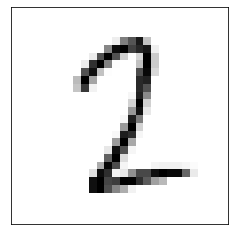

In [32]:

#Visor de la imagen a evaluar
plt.figure(figsize=(4, 4))
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(imagen, cmap=plt.cm.binary)
print("Predicción: " + class_names[np.argmax(prediccion[0])])
plt.show()

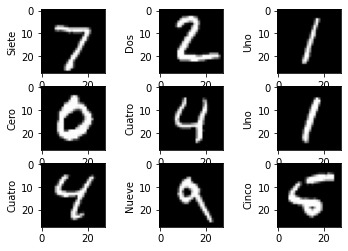

In [22]:
for i in range(9):
    number = X_pruebas[i]
    number = np.array([number])
    plt.subplot(330 + 1 + i)
    plt.imshow(X_pruebas[i], cmap=plt.get_cmap('gray'))
    prediccion = modelo.predict(number)
    plt.ylabel(class_names[np.argmax(prediccion[0])])
plt.show()